# Creating a Mie scattering table

This notebook demonstrates how to create a Mie scattering table using src/make_mie_table.f90. 

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [9]:
"""
Imports necessary for this notebook
"""
import os 
import matplotlib.pyplot as plt
from shdom import Mie

Computing mie table...
Done.


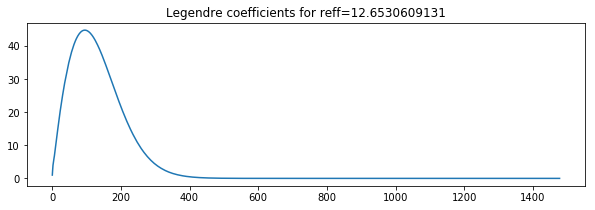

In [10]:
""" 
Create Mie table python object and compute a scattering table.
Note that this may take some time depending on the parameters set (mie computations are intensive).
"""

mie = Mie()

wavelength_band = (0.672, 0.672)
particle_type='Water' 
distribution='gamma'
alpha=7.0

mie.set_parameters(wavelength_band=wavelength_band,
                   particle_type=particle_type,
                   distribution=distribution,
                   alpha=alpha)

num_effective_radii=50
start_effective_radius=5.0
end_effective_radius=20.0
max_integration_radius=75.0
log_space_reff=False

mie.compute_table(num_effective_radii=num_effective_radii,
                  start_effective_radius=start_effective_radius,
                  end_effective_radius=end_effective_radius,
                  max_integration_radius=max_integration_radius,
                  log_space_reff=log_space_reff)


# Plot the Legendre series coefficients for some effective radius in the table
%matplotlib inline
plot_index = 25
plot_re = mie.reff[plot_index]
plot_legendre = mie.legcoef[:, plot_index]
plt.figure(figsize=(10,3))
plt.plot(plot_legendre)
plt.title('Legendre coefficients for reff={}'.format(plot_re))

In [11]:
""" 
Create a directory (if doesnt exist) and write the Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables'

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_672nm.scat')

mie.write_table(output_path)

Writing mie table to file: ../mie_tables/Water_672nm.scat
Done.


Reading mie table from file: ../mie_tables/Water_672nm.scat
Done.


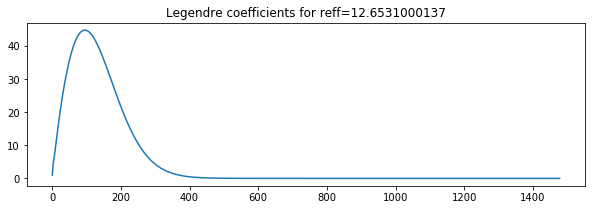

In [12]:
""" 
Load a previously saved mie table to a new mie object and plot the legendre coeffiecients.
"""

input_path = '../mie_tables/Water_672nm.scat'

mie = Mie()

mie.read_table(input_path)


# Plot the Legendre series coefficients for some effective radius in the table
plot_index = 25
plot_re = mie.reff[plot_index]
plot_legendre = mie.legcoef[:, plot_index]
plt.figure(figsize=(10,3))
plt.plot(plot_legendre)
plt.title('Legendre coefficients for reff={}'.format(plot_re))